<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Assignment_test/blob/main/IMDB_50k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Importing the Libraries

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.regularizers import l2

from sklearn.model_selection import train_test_split

import tensorflow_hub as hub



# Remove Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

path = "/content/drive/My Drive/Sem_3-Assignments/Deep Learning/IMDB Dataset.csv"
data = pd.read_csv(path).fillna(' ')

# Validate the Sample data
data.sample(10)

,review,sentiment
37600,Antonioni with Wim Wenders --some of the best ...,positive
32537,"I find this film meretricious, tentative, leth...",positive
12809,"I'm sorry, but ""Star Wars Episode 1"" did not d...",positive
12894,"Billed as a kind of sequel to The Full Monty, ...",negative
8454,At last!! Sandra Bullock is indeed a beautiful...,positive
25376,this is an honest attempt to make a bewitching...,positive
2876,Hail Bollywood and men Directors !<br /><br />...,negative
13880,For those who like their murder mysteries busy...,positive
46114,I am a huge fan of Ted V Mikels and the origin...,negative
13988,Watching this little movie is a sheer delight ...,positive


In [3]:
# Data Visualisaiton

print("2 Sample Positive Sentiment review:\n")
for i in data[data.sentiment == "positive"]['review'][:2]:
    print(i)
print("\n")

print("2 Sample Negative Sentiment review:\n")
for i in data[data.sentiment == "negative"]['review'][:2]:
    print(i)
print("\n")

2 Sample Positive Sentiment review:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main

The number of sentiments for Positive and Negative are:
 positive    25000
negative    25000
Name: sentiment, dtype: int64


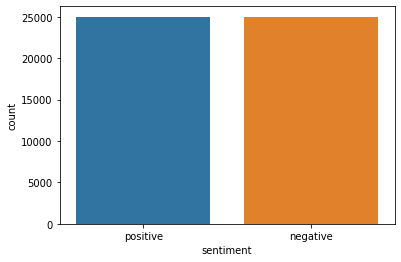

In [4]:
# Class Distribution

print("The number of sentiments for Positive and Negative are:\n", data.sentiment.value_counts())
sns.countplot(data['sentiment'])

In [5]:
# Wordcloud for Reviews

# Define a Wordcloud Function

def wordcloud_plotter(colval= "positive"):
    try:
        value = str(colval)

        comments = data['review'].loc[data['sentiment'] == value].values

        # Plot the WordCloud. For Wordcloud, Fontsize is given by their Frequency
        wordcloud = WordCloud(width= 640, height= 640, background_color= 'black', stopwords= STOPWORDS).generate(str(comments))

        # Plot the Figure
        fig = plt.figure(figsize= (12, 8), facecolor= 'k', edgecolor= 'k')

        # Show the Plot
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.tight_layout(pad= 0)
        plt.show();
    except:
        print("Failed Values! No Value in the Sentiment column found")

    return

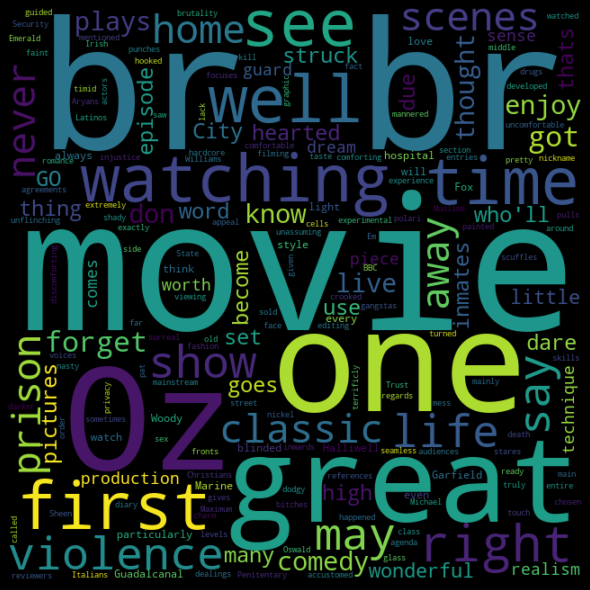

In [6]:
# Plot Wordcloud for Positive Values
wordcloud_plotter('positive')

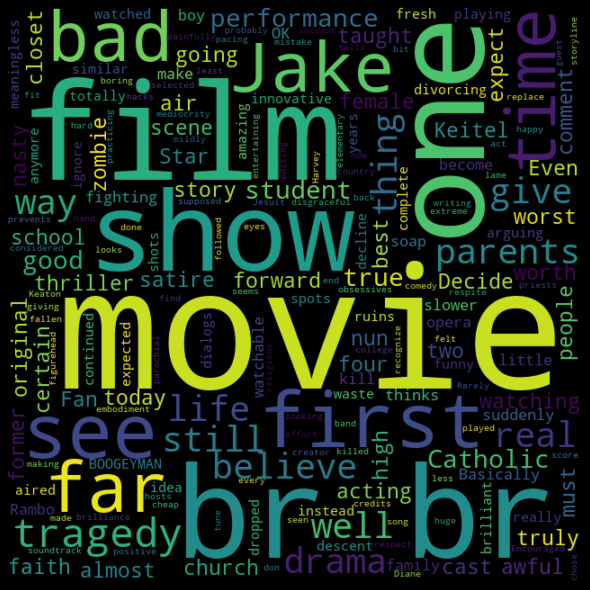

In [7]:
# Plot Wordcloud for Negative Values
wordcloud_plotter('negative')

In [8]:
# Map Output Values to Numericals
data['sentiment'] = data['sentiment'].map({'positive':0, 'negative': 1})

In [9]:
# Splitting the Data

from sklearn.model_selection import train_test_split

In [10]:
# Create a Binary Classification Problem by Taking only Toxic into Consideration

X = data['review'].values
y = data['sentiment'].values

In [11]:
# Train Test Split the Values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 7)

print(f"The Shape of the Training Set is {X_train.shape, y_train.shape}")
print(f"The Shape of the Training Set is {X_test.shape, y_test.shape}")

The Shape of the Training Set is ((40000,), (40000,))
The Shape of the Training Set is ((10000,), (10000,))


In [12]:
# Shape of the Dataset

print(f"The Shape of the Data is {data.shape}")

The Shape of the Data is (50000, 2)


In [13]:
y_test

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
# Model Building

model = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(model, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])


history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
79/79 [==============================] - 5s 70ms/step - loss: 0.5061 - accuracy: 0.7868 - val_loss: 0.3416 - val_accuracy: 0.8644
Epoch 2/5
79/79 [==============================] - 5s 65ms/step - loss: 0.2515 - accuracy: 0.9032 - val_loss: 0.2753 - val_accuracy: 0.8856
Epoch 3/5
79/79 [==============================] - 5s 65ms/step - loss: 0.1578 - accuracy: 0

In [25]:
# Model Building - Testing

model = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(model, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)


model = tf.keras.Sequential()
model.add(hub_layer)
"""
model.add(tf.keras.layers.Dense(64, kernel_regularizer=l2(0.1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, kernel_regularizer=l2(0.1)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
"""
model.add(tf.keras.layers.Dense(16, kernel_regularizer=l2(0.1),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, kernel_regularizer=l2(0.1),activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()




Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_23 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 124,644,897
Trainable params: 124,644,897
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [27]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/5
625/625 [==============================] - 47s 75ms/step - loss: 1.1026 - accuracy: 0.8041 - val_loss: 0.4667 - val_accuracy: 0.8716
Epoch 2/5
625/625 [==============================] - 47s 75ms/step - loss: 0.3825 - accuracy: 0.9025 - val_loss: 0.3785 - val_accuracy: 0.8868
Epoch 3/5
625/625 [==============================] - 47s 75ms/step - loss: 0.2945 - accuracy: 0.9329 - val_loss: 0.3573 - val_accuracy: 0.8901
Epoch 4/5
625/625 [==============================] - 47s 75ms/step - loss: 0.2428 - accuracy: 0.9529 - val_loss: 0.3619 - val_accuracy: 0.8838
Epoch 5/5
625/625 [==============================] - 47s 75ms/step - loss: 0.2065 - accuracy: 0.9655 - val_loss: 0.3528 - val_accuracy: 0.8884


In [44]:
# Total Training Time

print(f"The total Training Time is {round((47 * 5)/60, 2)} mins" )

The total Training Time is 3.92 mins


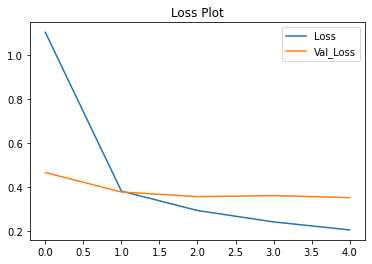

In [28]:
# Plot what's Returned by model.fit()

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_Loss")
plt.title("Loss Plot")
plt.legend();


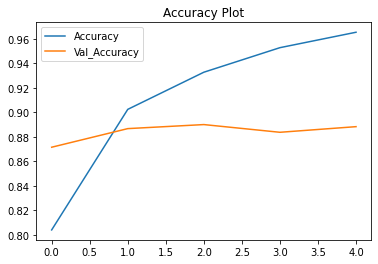

In [29]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.title("Accuracy Plot")
plt.legend();


In [32]:
# Evaluate the Model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3528 - accuracy: 0.8884


[0.3528014123439789, 0.8884000182151794]

In [30]:
# Make Predictions

y_pred = model.predict(X_test)


In [37]:
y_pred_val = [0 if i <= 0 else 1 for i in y_pred]

In [34]:
y_test

array([1, 0, 0, ..., 0, 1, 1])

In [39]:
# Metrics

from sklearn.metrics import confusion_matrix, classification_report

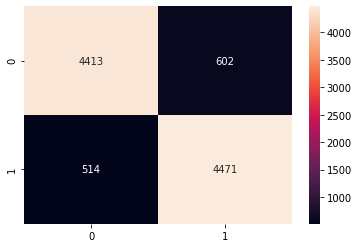

In [62]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_val), annot= True, fmt= "0.0f");

In [42]:
# Classification Report
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5015
           1       0.88      0.90      0.89      4985

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [58]:
# Model without Regularisation

model_noreg = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(model_noreg, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)


model_noreg = tf.keras.Sequential()
model_noreg.add(hub_layer)
model_noreg.add(tf.keras.layers.Dense(16,activation='relu'))
model_noreg.add(tf.keras.layers.Dropout(0.2))
model_noreg.add(tf.keras.layers.Dense(8, activation='relu'))
model_noreg.add(tf.keras.layers.Dense(1))

model_noreg.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])
# Timing

start = time.time()
history = model_noreg.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)
end = time.time()
print("Time taken for training is {} minutes".format(round((end - start)/60, 2)))

# Model Overfits

Epoch 1/5
79/79 [==============================] - 8s 100ms/step - loss: 0.5581 - accuracy: 0.7353 - val_loss: 0.3712 - val_accuracy: 0.8562
Epoch 2/5
79/79 [==============================] - 8s 98ms/step - loss: 0.2893 - accuracy: 0.8881 - val_loss: 0.2844 - val_accuracy: 0.8877
Epoch 3/5
79/79 [==============================] - 8s 98ms/step - loss: 0.1698 - accuracy: 0.9413 - val_loss: 0.2950 - val_accuracy: 0.8846
Epoch 4/5
79/79 [==============================] - 8s 98ms/step - loss: 0.1055 - accuracy: 0.9673 - val_loss: 0.3232 - val_accuracy: 0.8850
Epoch 5/5
79/79 [==============================] - 8s 98ms/step - loss: 0.0646 - accuracy: 0.9819 - val_loss: 0.3948 - val_accuracy: 0.8799
Time taken for training is 0.66 minutes


In [59]:
# Model with Dropout change

model_drp = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(model_drp, output_shape=[128], input_shape=[], 
                           dtype=tf.string, trainable=True)


model_drp = tf.keras.Sequential()
model_drp.add(hub_layer)
model_drp.add(tf.keras.layers.Dense(16,activation='relu'))
model_drp.add(tf.keras.layers.Dense(8, activation='relu'))
model_drp.add(tf.keras.layers.Dropout(0.35))
model_drp.add(tf.keras.layers.Dense(1))

model_drp.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])
# Timing

start = time.time()
history = model_drp.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    verbose=1)
end = time.time()
print("Time taken for training is {} minutes".format(round((end - start)/60, 2)))

# Model Overfits

Epoch 1/5
79/79 [==============================] - 8s 99ms/step - loss: 0.5501 - accuracy: 0.7198 - val_loss: 0.3721 - val_accuracy: 0.8644
Epoch 2/5
79/79 [==============================] - 8s 98ms/step - loss: 0.3390 - accuracy: 0.8877 - val_loss: 0.2978 - val_accuracy: 0.8877
Epoch 3/5
79/79 [==============================] - 8s 97ms/step - loss: 0.2455 - accuracy: 0.9362 - val_loss: 0.3179 - val_accuracy: 0.8830
Epoch 4/5
79/79 [==============================] - 8s 97ms/step - loss: 0.1913 - accuracy: 0.9611 - val_loss: 0.3306 - val_accuracy: 0.8813
Epoch 5/5
79/79 [==============================] - 8s 97ms/step - loss: 0.1544 - accuracy: 0.9767 - val_loss: 0.3587 - val_accuracy: 0.8796
Time taken for training is 0.66 minutes
